<a href="https://colab.research.google.com/github/panomsk/AB_test_experiments/blob/main/HW_plots_orb2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!ls '/content/drive/MyDrive/plots_res/'

Cluster_CPU		     perc_rt_steps_to_df.xlsx
cluster_cpu_base_params.pkl  plots_orbits_tests_2022.xlsx
cluster_cpu.pkl


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [101]:
df1 = pd.read_excel('/content/drive/MyDrive/plots_res/perc_rt_steps_to_df.xlsx')

In [102]:
df1.head(100)

,dataset,ref_ts,d_par,Z-нормализация,Вычисление LB,Заполнение битовой карты и отбор кандидатов,Вычисление DTW,Вычисление рейтинга кандидатов и пропущенных значений
0,chlorine,full,49,7.44,51.39,19.98,17.55,3.64
1,bafu,full,9,9.61,63.86,12.76,13.01,0.75
2,climate,full,9,4.41,45.24,23.74,25.30,1.31
3,madrid,full,9,7.52,69.65,10.69,11.27,0.87
4,marel,full,9,10.84,66.67,9.57,12.12,0.80
5,chlorine,min,4,7.46,63.68,9.44,9.78,9.64
6,bafu,min,3,9.08,63.32,15.25,11.50,0.85
7,climate,min,3,6.68,71.17,9.23,10.01,2.91
8,madrid,min,3,7.12,68.53,11.11,12.11,1.13
9,marel,min,3,9.37,60.25,11.81,17.26,1.30


In [103]:
df2 = pd.read_excel('/content/drive/MyDrive/plots_res/plots_orbits_tests_2022.xlsx')

In [104]:
df2.head()

,algoritm,dataset,ref_ts,d_par,RMSE,RT
0,SAGE,Chlorine,min,4,1.05,0.050
1,OGD-Impute,Chlorine,min,4,0.59,0.400
2,ORBITS (k=2),Chlorine,min,4,0.70,0.140
3,ORBITS (k=3),Chlorine,min,4,0.75,0.190
4,SPIRIT,Chlorine,min,4,0.43,0.003


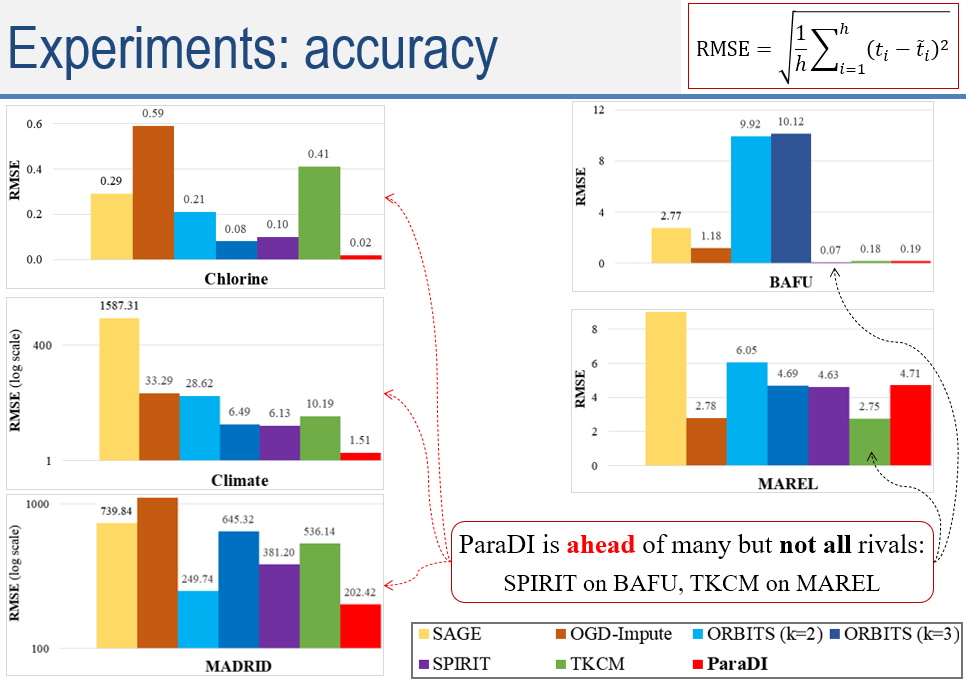

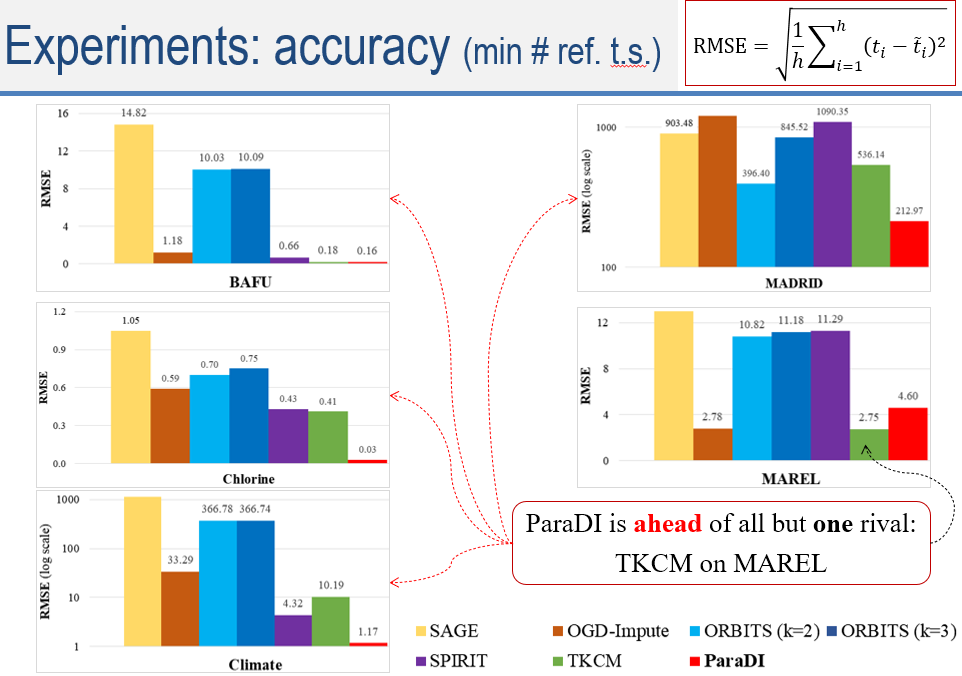

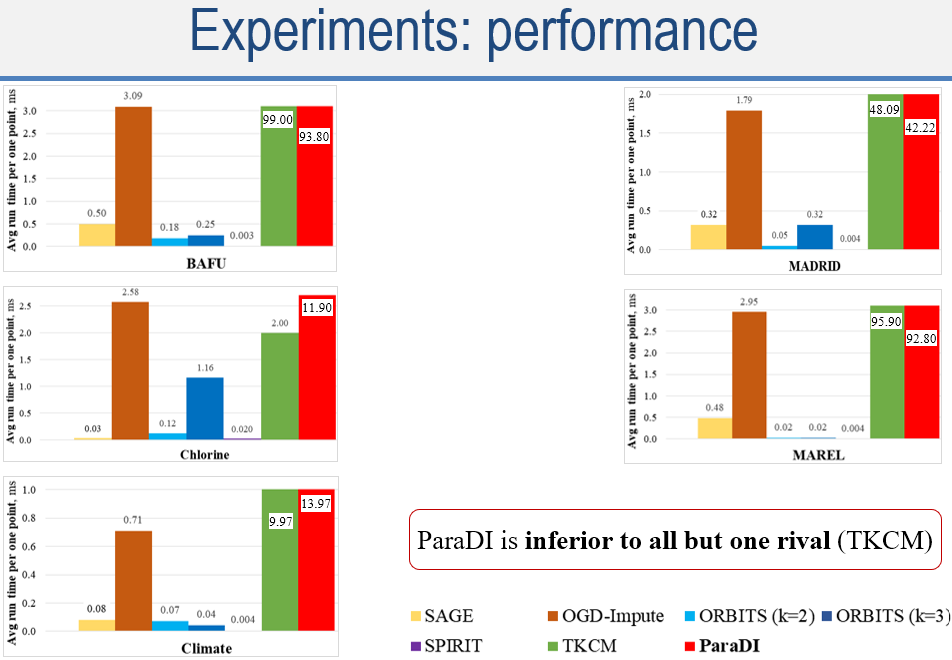

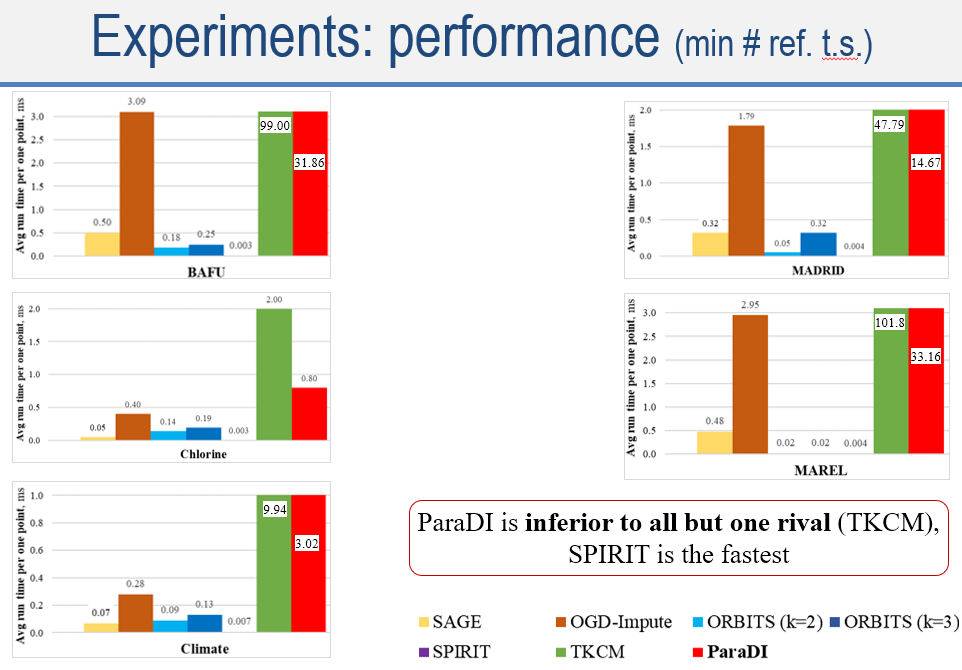

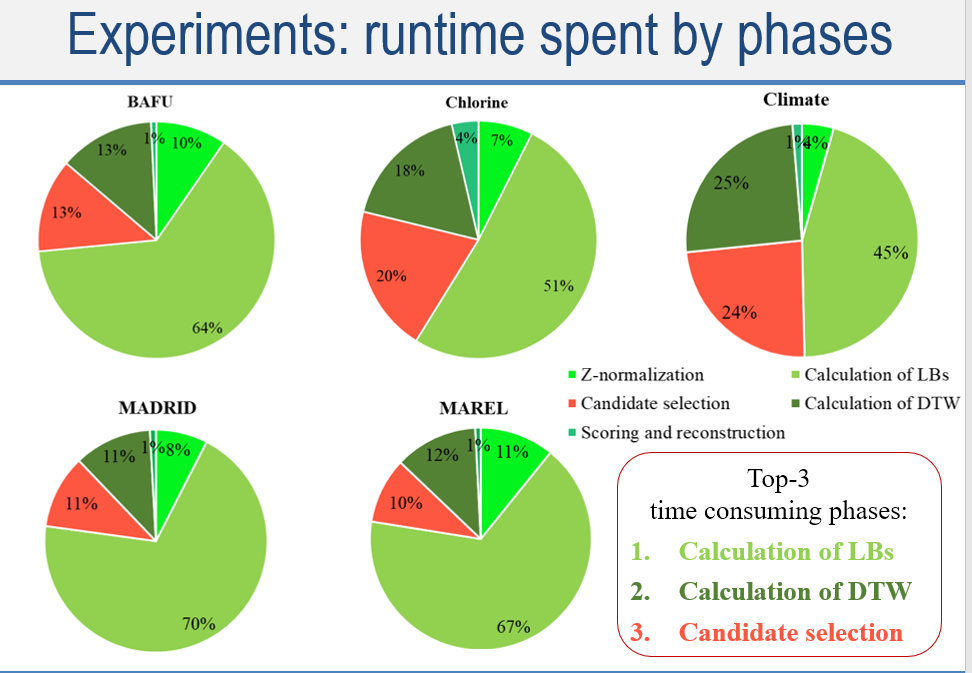

In [105]:
import seaborn as sns

In [139]:
pal = sns.color_palette("bright")
dict_palette = {'ParaDI CPU':pal[3],
            'ParaDI CPU+GPU':pal[1],
            'SAGE':pal[8],
            'OGD-Impute':pal[5],
            'ORBITS\xa0(k=2)':pal[9],
            'ORBITS\xa0(k=3)':pal[0],
            'SPIRIT':pal[4],
            'TKCM':pal[2],
           }
pal

[(0.00784313725490196, 0.24313725490196078, 1.0),
 (1.0, 0.48627450980392156, 0.0),
 (0.10196078431372549, 0.788235294117647, 0.2196078431372549),
 (0.9098039215686274, 0.0, 0.043137254901960784),
 (0.5450980392156862, 0.16862745098039217, 0.8862745098039215),
 (0.6235294117647059, 0.2823529411764706, 0.0),
 (0.9450980392156862, 0.2980392156862745, 0.7568627450980392),
 (0.6392156862745098, 0.6392156862745098, 0.6392156862745098),
 (1.0, 0.7686274509803922, 0.0),
 (0.0, 0.8431372549019608, 1.0)]

In [107]:
dict_datasets = {'chlorine':'Chlorine',
'bafu':'BAFU',
'climate':'Climate',
'madrid':'MADRID',
'marel':'MAREL'}
df1.replace(dict_datasets, inplace=True);

In [108]:
df2.algoritm.value_counts()

SAGE              10
OGD-Impute        10
ORBITS (k=2)      10
ORBITS (k=3)      10
SPIRIT            10
TKCM              10
ParaDI CPU        10
ParaDI CPU+GPU    10
Name: algoritm, dtype: int64

In [109]:
df_orb = df2.copy()
df_lb = df1.copy()

In [110]:
df_lb

,dataset,ref_ts,d_par,Z-нормализация,Вычисление LB,Заполнение битовой карты и отбор кандидатов,Вычисление DTW,Вычисление рейтинга кандидатов и пропущенных значений
0,Chlorine,full,49,7.44,51.39,19.98,17.55,3.64
1,BAFU,full,9,9.61,63.86,12.76,13.01,0.75
2,Climate,full,9,4.41,45.24,23.74,25.30,1.31
3,MADRID,full,9,7.52,69.65,10.69,11.27,0.87
4,MAREL,full,9,10.84,66.67,9.57,12.12,0.80
5,Chlorine,min,4,7.46,63.68,9.44,9.78,9.64
6,BAFU,min,3,9.08,63.32,15.25,11.50,0.85
7,Climate,min,3,6.68,71.17,9.23,10.01,2.91
8,MADRID,min,3,7.12,68.53,11.11,12.11,1.13
9,MAREL,min,3,9.37,60.25,11.81,17.26,1.30


In [111]:
df_GPU = df_lb.merge(df_orb[df_orb.algoritm.isin(['ParaDI CPU'])], how='left').sort_values(by=['dataset']).reset_index(drop=True)

In [112]:
#по известному значению % выполнения вычисляем LB_RT для CPU
df_GPU['LB_RT_CPU'] = round(df_GPU.RT * df_GPU['Вычисление LB'] / 100, 2)
df_GPU['RT_ALL_MINUS_LB_CPU'] = df_GPU['RT'] - df_GPU['LB_RT_CPU']

## КОРРЕКТИРОВКА

In [113]:
# ОСТАЛОСЬ заполнить колонку LB_RT_GPU и на ее основе вычислить полный RT на GPU
###!!!!!!!!!
#ПОКА ПРОСТО РАЗДЕЛИМ НА 2. ДАЛЕЕ КОЛОНКА БУДЕТ ВО ВХОДНОМ ФАЙЛЕ
#!!!!!!!!!!!!!!!!!!!!!!!!
df_GPU['LB_RT_GPU'] = round(df_GPU['LB_RT_CPU']/2, 2)

In [114]:
df_GPU['RT_GPU'] = df_GPU['LB_RT_GPU'] + df_GPU['RT_ALL_MINUS_LB_CPU']
df_GPU.algoritm = 'ParaDI CPU+GPU'

In [115]:
df_GPU

,dataset,ref_ts,d_par,Z-нормализация,Вычисление LB,Заполнение битовой карты и отбор кандидатов,Вычисление DTW,Вычисление рейтинга кандидатов и пропущенных значений,algoritm,RMSE,RT,LB_RT_CPU,RT_ALL_MINUS_LB_CPU,LB_RT_GPU,RT_GPU
0,BAFU,full,9,9.61,63.86,12.76,13.01,0.75,ParaDI CPU+GPU,0.19,93.80,59.90,33.90,29.95,63.85
1,BAFU,min,3,9.08,63.32,15.25,11.50,0.85,ParaDI CPU+GPU,0.16,31.86,20.17,11.69,10.09,21.78
2,Chlorine,full,49,7.44,51.39,19.98,17.55,3.64,ParaDI CPU+GPU,0.02,11.90,6.12,5.78,3.06,8.84
3,Chlorine,min,4,7.46,63.68,9.44,9.78,9.64,ParaDI CPU+GPU,0.03,0.80,0.51,0.29,0.26,0.55
4,Climate,full,9,4.41,45.24,23.74,25.30,1.31,ParaDI CPU+GPU,1.51,13.70,6.20,7.50,3.10,10.60
5,Climate,min,3,6.68,71.17,9.23,10.01,2.91,ParaDI CPU+GPU,1.17,3.02,2.15,0.87,1.08,1.95
6,MADRID,full,9,7.52,69.65,10.69,11.27,0.87,ParaDI CPU+GPU,202.42,42.22,29.41,12.81,14.70,27.51
7,MADRID,min,3,7.12,68.53,11.11,12.11,1.13,ParaDI CPU+GPU,212.97,14.67,10.05,4.62,5.03,9.65
8,MAREL,full,9,10.84,66.67,9.57,12.12,0.80,ParaDI CPU+GPU,4.71,92.80,61.87,30.93,30.94,61.87
9,MAREL,min,3,9.37,60.25,11.81,17.26,1.30,ParaDI CPU+GPU,4.60,33.16,19.98,13.18,9.99,23.17


## Осталось заполнить значения в исходном df по orbits

In [116]:
df_orb

,algoritm,dataset,ref_ts,d_par,RMSE,RT
0,SAGE,Chlorine,min,4,1.05,0.050
1,OGD-Impute,Chlorine,min,4,0.59,0.400
2,ORBITS (k=2),Chlorine,min,4,0.70,0.140
3,ORBITS (k=3),Chlorine,min,4,0.75,0.190
4,SPIRIT,Chlorine,min,4,0.43,0.003
...,...,...,...,...,...,...
75,ORBITS (k=3),Climate,full,9,6.49,0.040
76,SPIRIT,Climate,full,9,6.13,0.004
77,TKCM,Climate,full,9,10.19,9.970
78,ParaDI CPU,Climate,full,9,1.51,13.700


In [117]:
col_merge = ['algoritm', 'dataset', 'd_par', 'ref_ts']
df_orb = df_orb.merge(df_GPU[col_merge+['RT_GPU']], how='left', on=col_merge)

In [118]:
df_orb.loc[df_orb.algoritm=='ParaDI CPU+GPU','RT'] = df_orb.RT_GPU

In [119]:
df_orb.head(30)

,algoritm,dataset,ref_ts,d_par,RMSE,RT,RT_GPU
0,SAGE,Chlorine,min,4,1.05,0.050,NaN
1,OGD-Impute,Chlorine,min,4,0.59,0.400,NaN
2,ORBITS (k=2),Chlorine,min,4,0.70,0.140,NaN
3,ORBITS (k=3),Chlorine,min,4,0.75,0.190,NaN
4,SPIRIT,Chlorine,min,4,0.43,0.003,NaN
5,TKCM,Chlorine,min,4,0.41,2.000,NaN
6,ParaDI CPU,Chlorine,min,4,0.03,0.800,NaN
7,ParaDI CPU+GPU,Chlorine,min,4,0.03,0.550,0.55
8,SAGE,Chlorine,full,49,0.29,0.030,NaN
9,OGD-Impute,Chlorine,full,49,0.59,2.580,NaN


<ipython-input-143-f3374f84bb11>:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(12,6))


<Figure size 864x432 with 0 Axes>

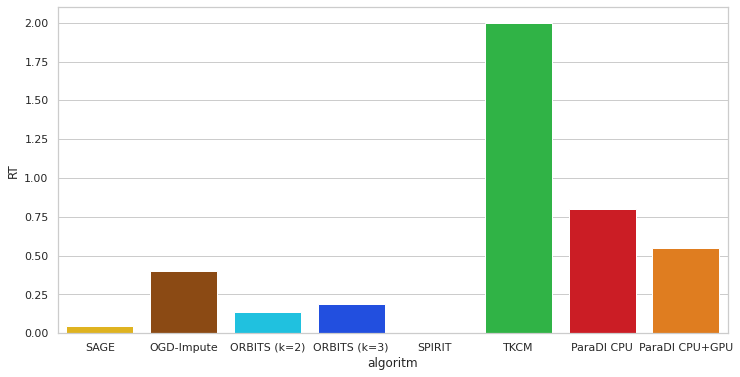

<Figure size 864x432 with 0 Axes>

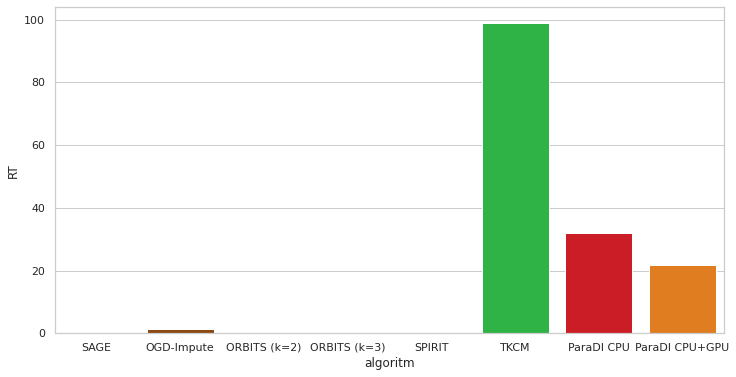

<Figure size 864x432 with 0 Axes>

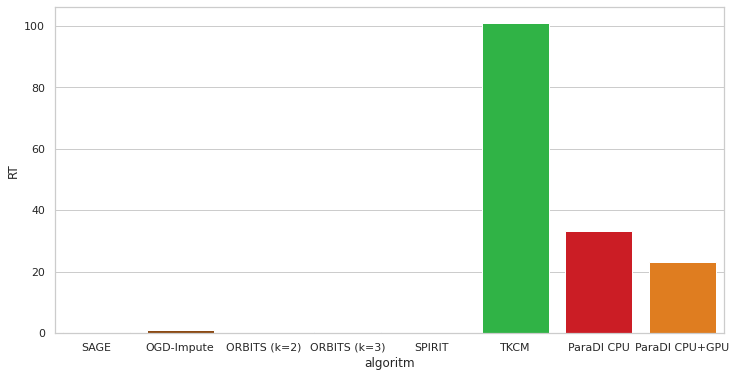

<Figure size 864x432 with 0 Axes>

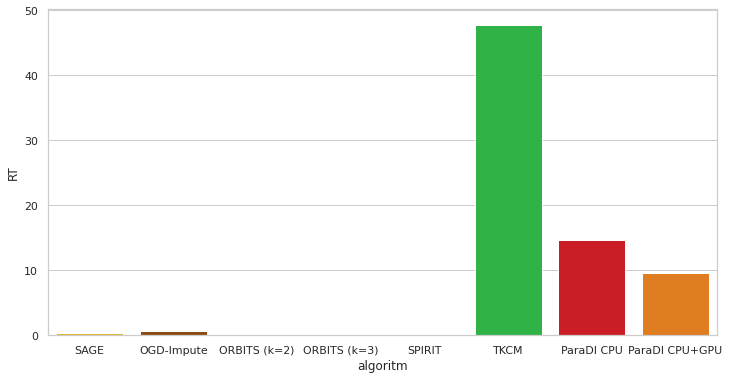

<Figure size 864x432 with 0 Axes>

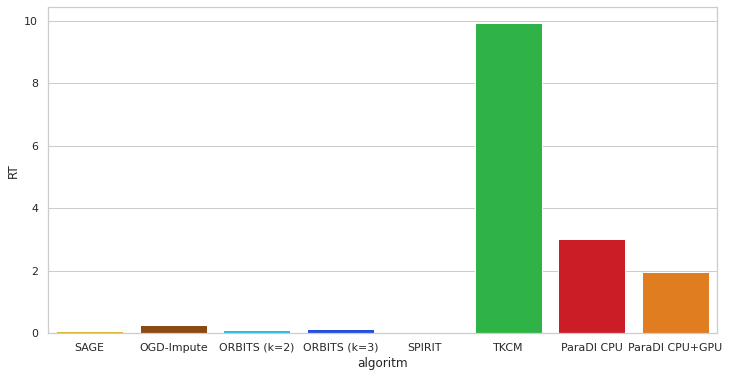

<Figure size 864x432 with 0 Axes>

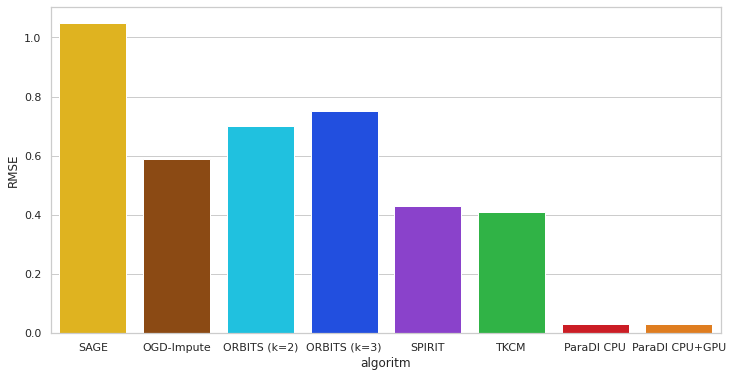

<Figure size 864x432 with 0 Axes>

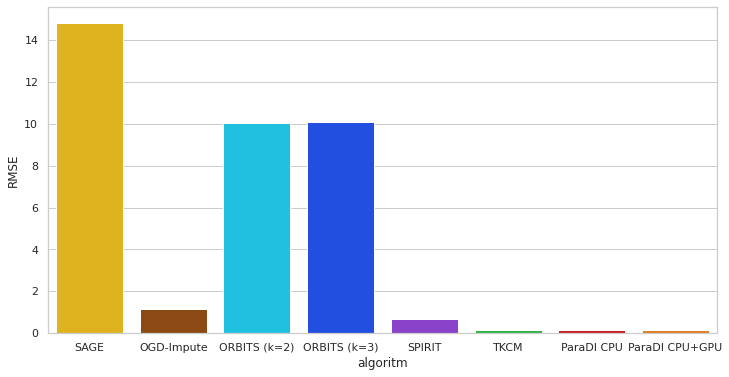

<Figure size 864x432 with 0 Axes>

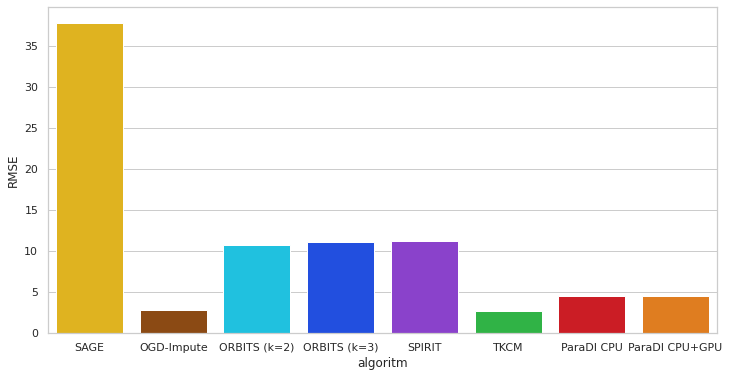

<Figure size 864x432 with 0 Axes>

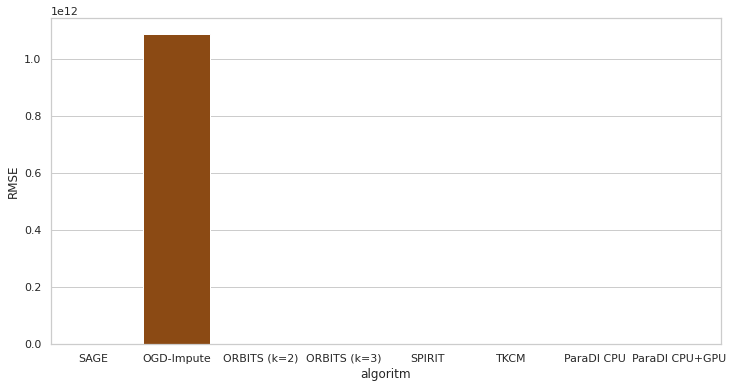

<Figure size 864x432 with 0 Axes>

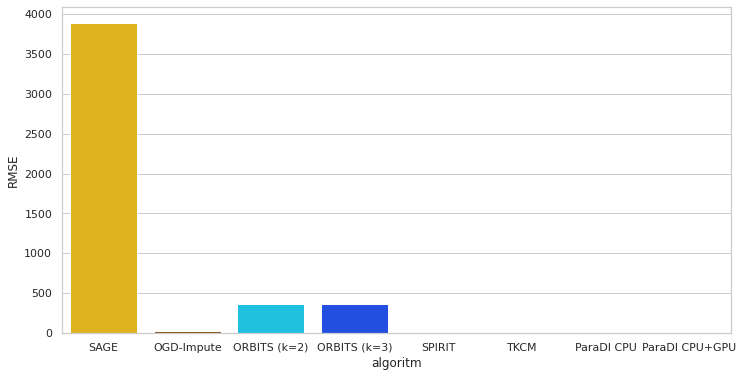

<Figure size 864x432 with 0 Axes>

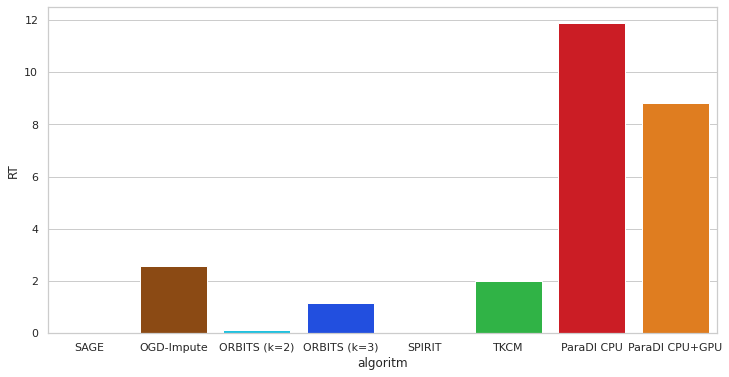

<Figure size 864x432 with 0 Axes>

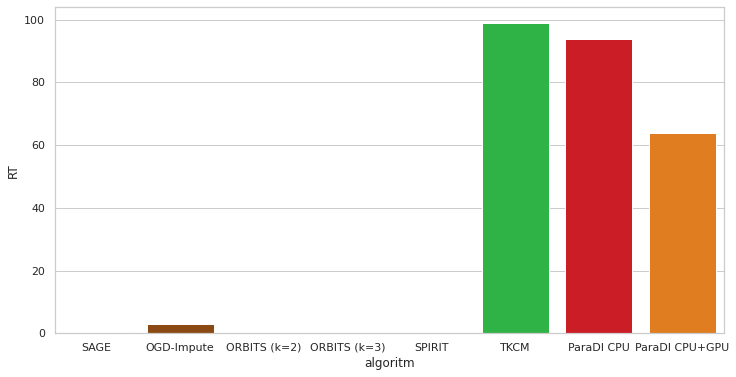

<Figure size 864x432 with 0 Axes>

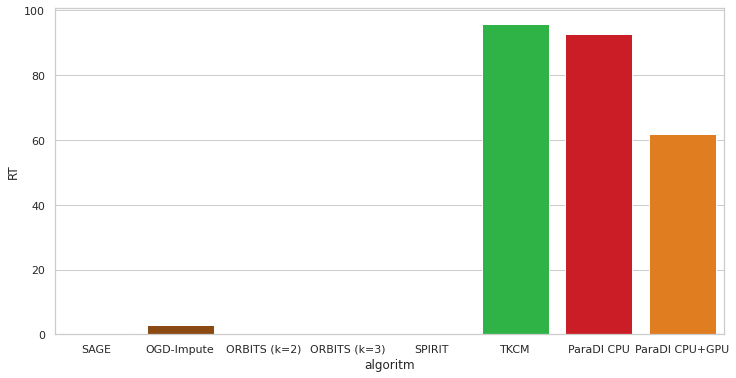

<Figure size 864x432 with 0 Axes>

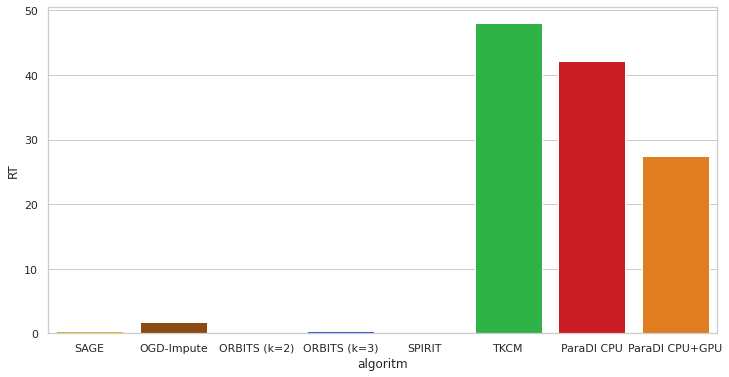

<Figure size 864x432 with 0 Axes>

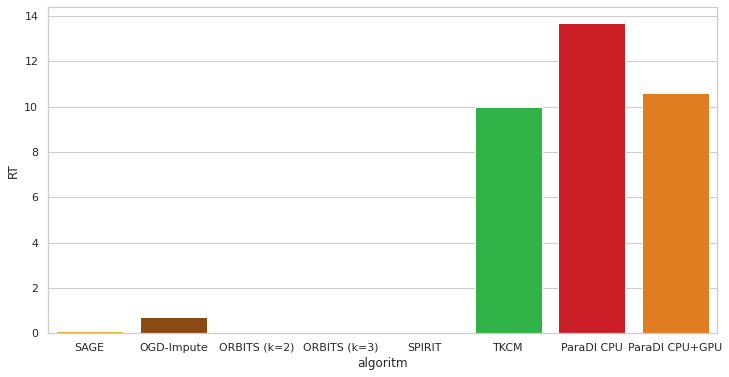

<Figure size 864x432 with 0 Axes>

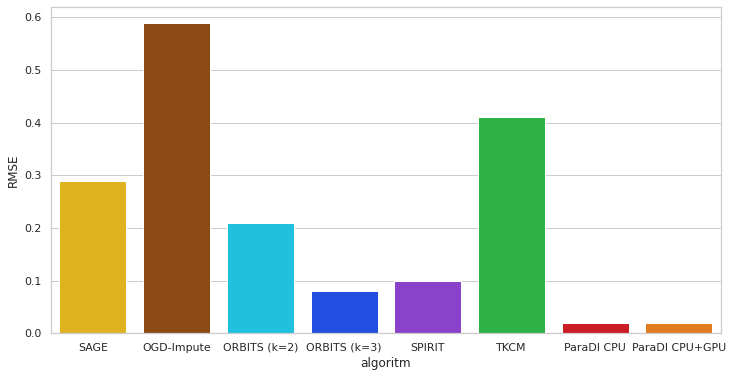

<Figure size 864x432 with 0 Axes>

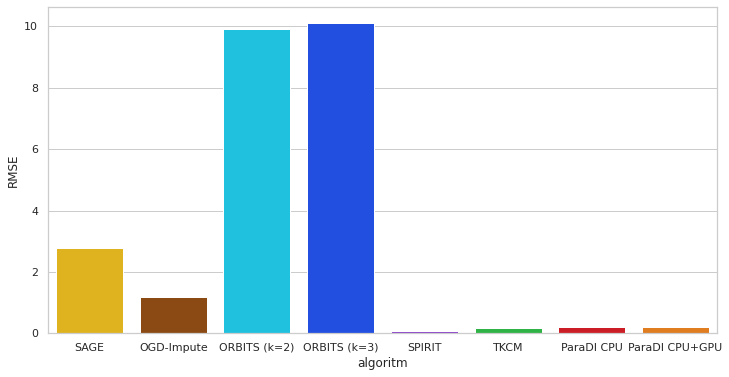

<Figure size 864x432 with 0 Axes>

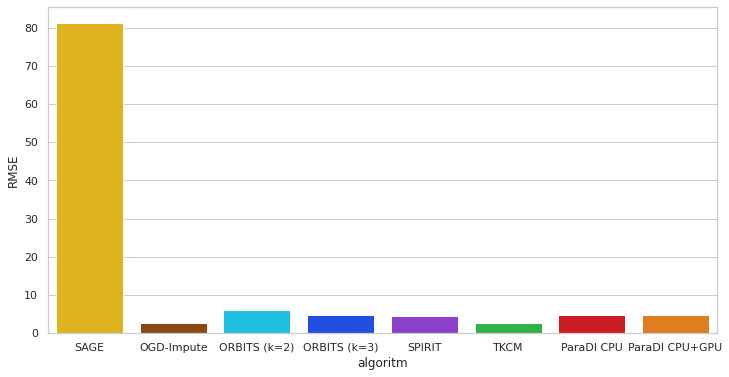

<Figure size 864x432 with 0 Axes>

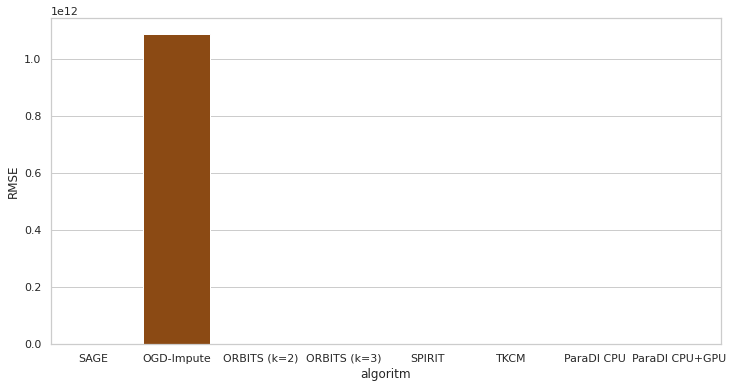

<Figure size 864x432 with 0 Axes>

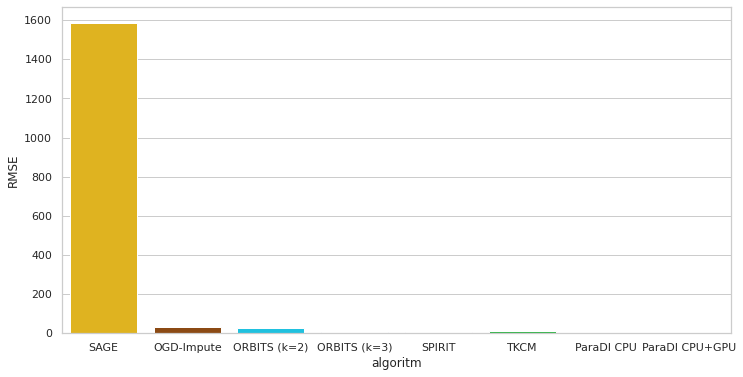

In [143]:
dataset_list = ['Chlorine', 'BAFU', 'MAREL', 'MADRID', 'Climate']
for ref_ts in ['min','full']:
  for y in ['RT', 'RMSE']:
    for dataset in dataset_list:
      #print(ref_ts, dataset)
      df_temp = df_orb[(df_orb.dataset == dataset) & (df_orb.ref_ts == ref_ts)]
      plt.figure(figsize=(12,6))
      plt.figure(figsize=(12,6))
      sns.set(font_scale=1)
      sns.set_style('whitegrid')
      sns.barplot(data=df_temp, x='algoritm', y=y, palette = dict_palette);


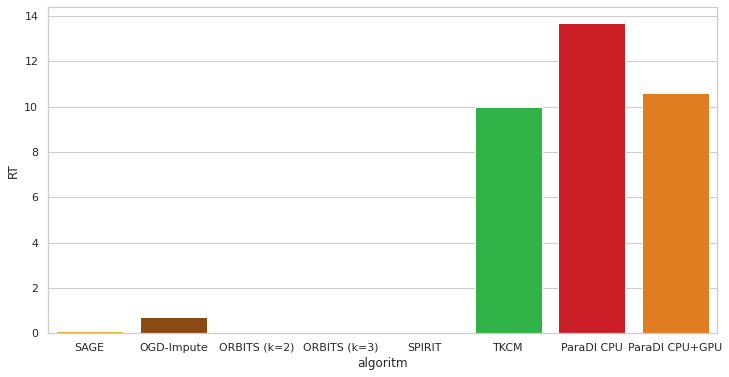

In [140]:
plt.figure(figsize=(12,6))
sns.set(font_scale=1)
sns.set_style('whitegrid')
sns.barplot(data=df_temp, x='algoritm', y='RT', palette = dict_palette);
